In [1]:
%matplotlib inline

In [13]:
import numpy as np
import pandas as pd

from scipy.stats import poisson, norm
from matplotlib import pyplot as plt
from functools import partial

from helpers import  pr_EI_long, pr_MO_long, pr_IM_long
from core import do_simulation
from const import *

In [3]:
TOTAL_DAYS = 75  # the number of days
INITIAL_NUM_BEDS = 3000
INITIAL_NUM_E = 5

TOTAL_POPULATION = 9000000

K_DAYS = 21

In [20]:
class Params:
    def __init__(self,
                 # infection-related parameters:
                 alpha=0.02, beta=0.01, mu_ei=5.2, mu_mo=10, x0_pt=10000,  k_pt=0.0001,
                 k_days=14,
                 # city-related
                 total_population=9000000,
                 initial_num_E=5
                ):
        
        self.total_population = total_population
        self.initial_num_E = initial_num_E
        
        # probability  parameters
        # S -> E
        self.alpha = alpha
        self.beta  = beta

        # E -> I: Poisson
        self.mu_ei = mu_ei

        # I -> M: geoemtric
        self.x0_pt = x0_pt
        self.k_pt = k_pt

        # M -> O: Poisson
        self.mu_mo = mu_mo
        
        # time window size
        self.k_days = k_days
    

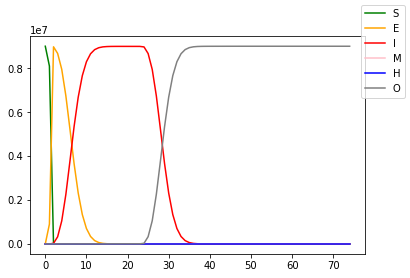

In [25]:
params = Params()
total, delta, inc = do_simulation(15, [(0, 3000)], params)
fig, ax = plt.subplots(1, 1)
for color, s in zip(COLORS, range(data.shape[1])):
    ax.plot(data[:, s], c=color)
fig.legend(STATES)